***Chapter 3***

A box contains 8 red marbles and 3 green marbles. Six marbles are drawn at
random without replacement. (How many outcomes result in all 3 green marbles being drawn?)
Find the probability distribution for the number of green marbles drawn.

[0.06060606060606061, 0.36363636363636365, 0.45454545454545453, 0.12121212121212122]


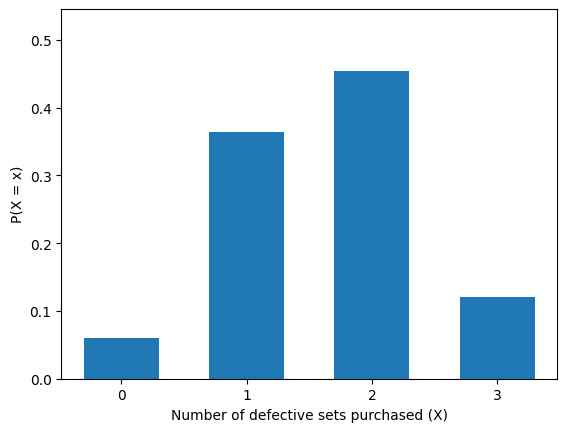

In [4]:
from math import comb
import matplotlib.pyplot as plt

n_red = 8
n_green = 3
n = 6   # chosen
N = n_red + n_green

x_values = range(0, n_green + 1)
pmf = []
for x in x_values:
    pmf.append(comb(n_green, x) * comb(n_red, n - x) / comb(N, n))

print(pmf)
plt.bar(x_values, pmf, width=0.6)
plt.xlabel("Number of defective sets purchased (X)")
plt.ylabel("P(X = x)")
plt.xticks(x_values)
plt.ylim(0, max(pmf) * 1.2)
plt.show()

A probability distribution for a random variable \(X\):

| \(x\)        | \(-8\) | \(-3\) | \(-1\) | \(0\) | \(1\) | \(4\) | \(6\) |
|-------------|--------|--------|--------|-------|-------|-------|-------|
| \(P(X=x)\)  | 0.13   | 0.15   | 0.17   | 0.20  | 0.15  | 0.11  | 0.09  |

Write the CDF of X

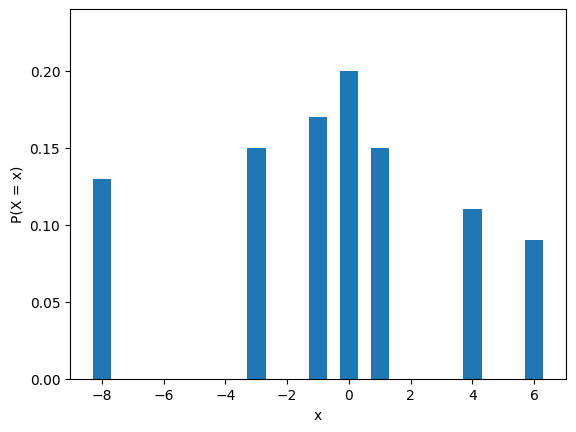

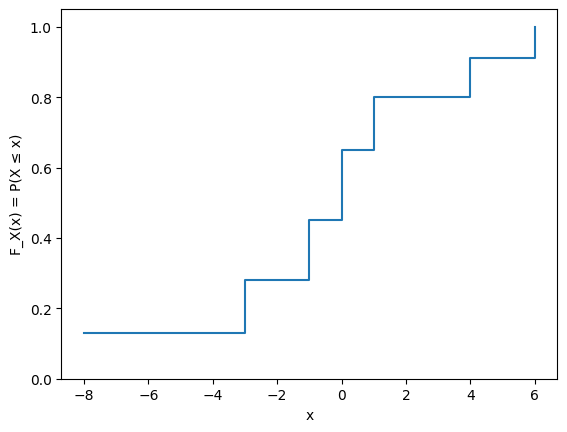

In [5]:
import numpy as np
import pandas as pd

# Given PMF
x = np.array([-8, -3, -1, 0, 1, 4, 6])
p = np.array([0.13, 0.15, 0.17, 0.20, 0.15, 0.11, 0.09])

# Compute CDF
cdf = np.cumsum(p)

plt.bar(x, p, width=0.6)
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.ylim(0, max(p) * 1.2)
plt.show()

plt.step(x, cdf, where="post")
plt.xlabel("x")
plt.ylabel("F_X(x) = P(X ≤ x)")
plt.ylim(0, 1.05)
plt.yticks(np.linspace(0, 1, 6))
plt.show()


A probability distribution for a random variable \(X\):

| \(x\) | 0 | 1 | 2 | 3 | 4 |
|-----|---|---|---|---|---|
| \(f(x)\) | 0.4 | 0.1 | 0.1 | 0.1 | 0.3 |

Find the cdf

Sum of probabilities = 1.0


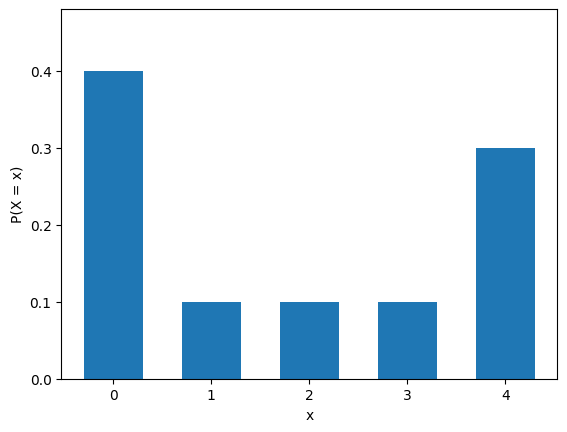

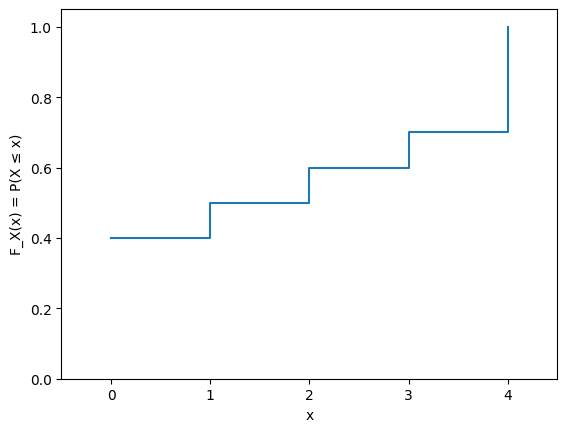

In [26]:
# %%
import numpy as np
import pandas as pd

# Define the PMF
x = np.array([0, 1, 2, 3, 4])
p = np.array([0.4, 0.1, 0.1, 0.1, 0.3])

# Sanity check
print(f"Sum of probabilities = {p.sum():.1f}")

# Compute the CDF
cdf = np.cumsum(p)

# Display table
df = pd.DataFrame({
    "x": x,
    "f(x)": p,
    "F(x) = P(X ≤ x)": cdf
})

plt.bar(x, p, width=0.6)
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.ylim(0, max(p) * 1.2)
plt.show()

plt.step(x, cdf, where="post")
plt.xlabel("x")
plt.ylabel("F_X(x) = P(X ≤ x)")
plt.ylim(0, 1.05)
plt.xlim(-0.5, 4.5)
plt.yticks(np.linspace(0, 1, 6))
plt.show()



Two ballpoint pens are selected at random from a box with:
3 blue, 2 red, 3 green (8 total).
X = number of blue pens selected, Y = number of red pens selected.
Find the joint pmf f (x, y ).

In [9]:
# Counts of pens
blue = 3
red = 2
green = 3
total = blue + red + green
n_chosen = 2

# Total equally likely outcomes
total_outcomes = comb(total, n_chosen)

# Joint pmf f(x, y)
def joint_pmf(x, y):
    # number of green pens selected
    g = 2 - x - y
    if x < 0 or y < 0 or g < 0:
        return 0.0
    if x > blue or y > red or g > green:
        return 0.0
    favorable = comb(blue, x) * comb(red, y) * comb(green, g)
    return favorable / total_outcomes

# Print joint pmf table
print("Joint pmf f(x,y):\n")
print("      y=0      y=1      y=2")
for x in range(0,n_chosen+1):
    row = []
    for y in range(0,n_chosen+1):
        row.append(f"{joint_pmf(x,y):.5f}")
    print(f"x={x}  " + "  ".join(row))

Joint pmf f(x,y):

      y=0      y=1      y=2
x=0  0.10714  0.21429  0.03571
x=1  0.32143  0.21429  0.00000
x=2  0.10714  0.00000  0.00000
